checkout: https://www.learnopencv.com/image-recognition-and-object-detection-part1/ 

## 1. PREPROCESSING

In [4]:
import sklearn
import pandas
import numpy as np

In [19]:
#import matplotlib with poetry 

load an image

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import numpy as np

checkout:https://matplotlib.org/2.0.0/users/image_tutorial.html
It’s a 24-bit RGB PNG image (8 bits for each of R, G, B). Depending on where you get your data, the other kinds of image that you’ll most likely encounter are RGBA images, which allow for transparency, or single-channel grayscale (luminosity) images.

In [6]:
# path: data_set/box_pictures/box{#nr}_color$
img=mpimg.imread('data_set/box_pictures/training/box1_color/box1_1.png')

To show an image

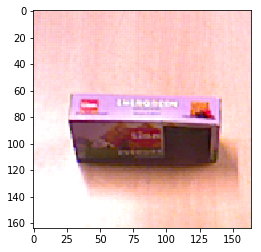

In [32]:
imgplot = plt.imshow(img)

To show img matrix 

In [35]:
img

array([[[0.9764706 , 0.74509805, 0.73333335],
        [0.98039216, 0.7254902 , 0.7411765 ],
        [1.        , 0.7490196 , 0.7647059 ],
        ...,
        [1.        , 0.8117647 , 0.8235294 ],
        [1.        , 0.80784315, 0.81960785],
        [1.        , 0.8156863 , 0.8039216 ]],

       [[0.9882353 , 0.7647059 , 0.76862746],
        [0.9764706 , 0.7647059 , 0.75686276],
        [0.99607843, 0.78039217, 0.77254903],
        ...,
        [1.        , 0.8117647 , 0.827451  ],
        [1.        , 0.8156863 , 0.8352941 ],
        [1.        , 0.8156863 , 0.79607844]],

       [[0.98039216, 0.74509805, 0.7529412 ],
        [0.972549  , 0.7529412 , 0.77254903],
        [0.98039216, 0.7647059 , 0.78431374],
        ...,
        [1.        , 0.8156863 , 0.8117647 ],
        [1.        , 0.8117647 , 0.80784315],
        [1.        , 0.7921569 , 0.75686276]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [36]:
lum_img = img[:,:,0]

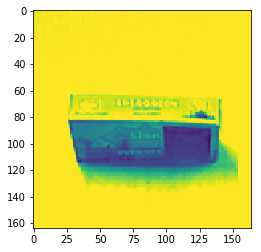

In [37]:
plt.imshow(lum_img)

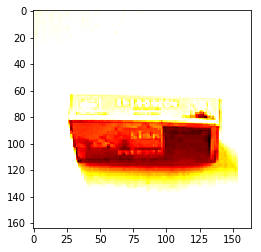

In [38]:
plt.imshow(lum_img, cmap="hot")

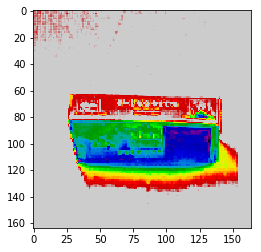

In [39]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

There are many other colormap schemes available. See the list and images of the colormaps: https://matplotlib.org/2.0.0/examples/color/colormaps_reference.html 

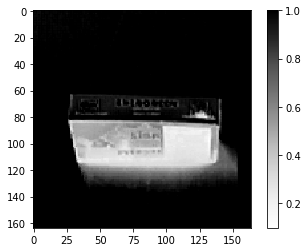

In [108]:
img=mpimg.imread('data_set/box_pictures/training/box1_color/box1_1.png')
grey_img = img[:,:,0]
imgplot_grey = plt.imshow(grey_img)
imgplot_grey.set_cmap('Greys')
plt.colorbar() # represents what value color has

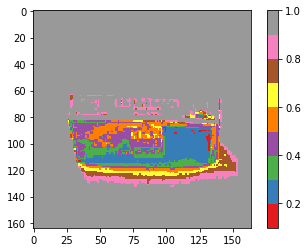

In [109]:
img=mpimg.imread('data_set/box_pictures/training/box1_color/box1_1.png')
accent_img = img[:,:,0]
imgplot_accent = plt.imshow(accent_img)
imgplot_accent.set_cmap('Set1')
plt.colorbar()

A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the hist() function.

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 4.0000e+00, 3.0000e+00, 8.0000e+00, 3.0000e+00,
        1.0000e+01, 1.6000e+01, 1.0000e+01, 1.8000e+01, 2.3000e+01,
        3.6000e+01, 1.7000e+01, 2.3000e+01, 3.5000e+01, 1.9000e+01,
        2.4000e+01, 4.0000e+01, 8.3000e+01, 1.0100e+02, 6.3000e+01,
        6.9000e+01, 7.6000e+01, 6.3000e+01, 5.9000e+01, 5.4000e+01,
        4.9000e+01, 8.2000e+01, 5.7000e+01, 5.50

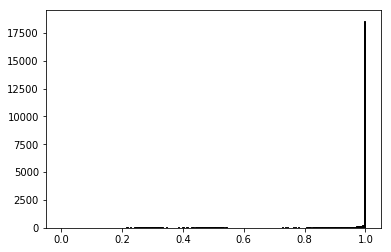

In [57]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

Most often, the “interesting” part of the image is around the peak, and you can get extra contrast by clipping the regions above and/or below the peak. In our histogram, it looks like there’s not much useful information in the high end (not many white things in the image). Let’s adjust the upper limit, so that we effectively “zoom in on” part of the histogram. We do this by passing the clim argument to imshow. You could also do this by calling the set_clim() method of the image plot object.

img: box1_1


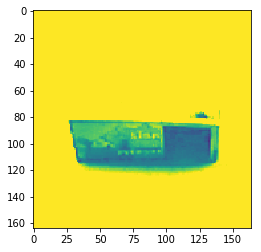

In [60]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))
print("img: box1_1")

What this does to the box is remove a bit how deep the box is by just having the front, i.e. the most contrasted part disappear.

img5: box1_5


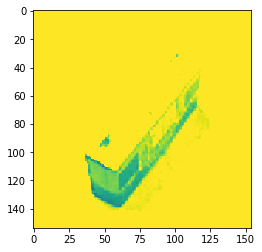

In [110]:
img5=mpimg.imread('data_set/box_pictures/training/box1_color/box1_5.png')
lum_img5 = img5[:,:,0]
imgplot = plt.imshow(lum_img5, clim=(0.0, 0.7))
print("img5: box1_5")

In the image of box1_5 2 sides are mainly visible, so it's not reliable to only give one side. However it does give a good contrast between angles.

Interpolation calculates what the color or value of a pixel “should” be, according to different mathematical schemes. One common place that this happens is when you resize an image. The number of pixels change, but you want the same information. Since pixels are discrete, there’s missing space. Interpolation is how you fill that space. This is why your images sometimes come out looking pixelated when you blow them up. The effect is more pronounced when the difference between the original image and the expanded image is greater. Let’s take our image and shrink it. We’re effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren’t there anymore, and the computer has to draw in pixels to fill that space.

In [100]:
# We’ll use the Pillow library that we used to load the image also to resize the image.(poetry add pillow)
from PIL import Image

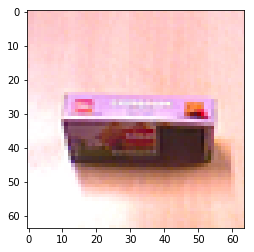

In [111]:
img = Image.open('data_set/box_pictures/training/box1_color/box1_1.png')
img.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
imgplot = plt.imshow(img)

TRY PREPROCESSING WITH RGB -> LAB CONVERSION.

# HOG FEATURES

checkout https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-download-auto-examples-features-detection-plot-hog-py

In [1]:
import skimage
from skimage.feature import hog
from skimage import (
    data,
    exposure
)

In [7]:
img=mpimg.imread('data_set/box_pictures/training/box1_color/box1_1.png')

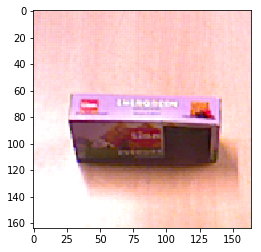

In [8]:
plt.imshow(img)

In [9]:
fd, hog_img = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

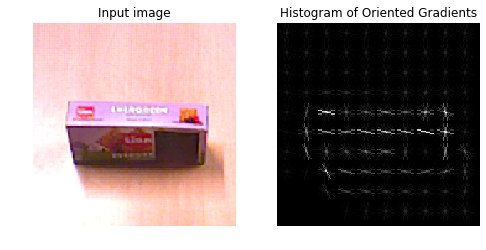

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_img_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### 2. load all images into a big list: see transient.ipynb

# 2. SVM support-Vector-Machine

(run through classifier to make model)

In [8]:
#import numpy as np
#import matplotlib.pyplot as plt
from sklearn import (
    svm,
    datasets
)

In [9]:
# Prepare training data, X holds the inputs, Y holds the hand-written outputs

#input = [img1,...,img_n]
#output = [angle_from_json]

In [ ]:
clf = svm.SVC(gamma='scale')
clf.fit(X, y)

wrap the needed steps into a pipeline(receiving_image(), classify_orientation(), grasp object())